# *Data Augmentation* y *Transfer Learning*


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.2



## Datos


In [ ]:
from google.colab import files
# se debe cargar el fichero “cats_and_dogs_small.zip”
files.upload()

Saving cats_and_dogs_small.zip to cats_and_dogs_small.zip


In [ ]:
!ls

sample_data


In [ ]:
import os
import zipfile

local_zip = '/content/cats_and_dogs_small.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()


In [ ]:

base_dir = '/content/cats_and_dogs_small'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imágenes de Entrenamiento
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con las imágenes de validacion
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directorio con las imágenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')



In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir( train_dogs_dir )
print(train_dog_fnames[:5])

validation_cat_fnames = os.listdir( validation_cats_dir )
print(validation_cat_fnames[:5])

validation_dog_fnames = os.listdir( validation_dogs_dir )
print(validation_dog_fnames[:5])

test_cat_fnames = os.listdir( test_cats_dir )
print(test_cat_fnames[:5])

test_dog_fnames = os.listdir( test_dogs_dir )
print(test_dog_fnames[:5])


['cat.845.jpg', 'cat.644.jpg', 'cat.376.jpg', 'cat.545.jpg', 'cat.377.jpg']
['dog.697.jpg', 'dog.57.jpg', 'dog.600.jpg', 'dog.476.jpg', 'dog.700.jpg']
['cat.1389.jpg', 'cat.1370.jpg', 'cat.1048.jpg', 'cat.1407.jpg', 'cat.1322.jpg']
['dog.1228.jpg', 'dog.1468.jpg', 'dog.1147.jpg', 'dog.1435.jpg', 'dog.1249.jpg']
['cat.1922.jpg', 'cat.1998.jpg', 'cat.1838.jpg', 'cat.1995.jpg', 'cat.1920.jpg']
['dog.1999.jpg', 'dog.1847.jpg', 'dog.1506.jpg', 'dog.1985.jpg', 'dog.1903.jpg']


In [ ]:
print('total de Imágenes entrenamiento de Gatos :', len(os.listdir(train_cats_dir ) ))
print('total de Imágenes entrenamiento de Perros :', len(os.listdir(train_dogs_dir ) ))

print('total de Imágenes Validación de Gatos :', len(os.listdir( validation_cats_dir ) ))
print('total de Imágenes Validación de Perros :', len(os.listdir( validation_dogs_dir ) ))

print('total de Imágenes Test de Gatos  :', len(os.listdir( test_cats_dir ) ))
print('total de Imágenes Test de Perros :', len(os.listdir( test_dogs_dir ) ))


total de Imágenes entrenamiento de Gatos : 1000
total de Imágenes entrenamiento de Perros : 1000
total de Imágenes Validación de Gatos : 500
total de Imágenes Validación de Perros : 500
total de Imágenes Test de Gatos  : 500
total de Imágenes Test de Perros : 500


Figura Data de Gatos para el Entrenamiento


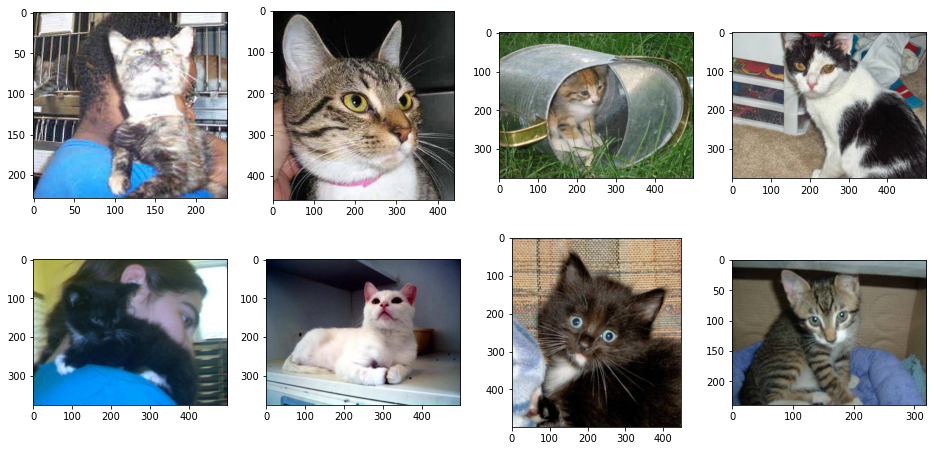

Figura Data de Perros para el Entrenamiento


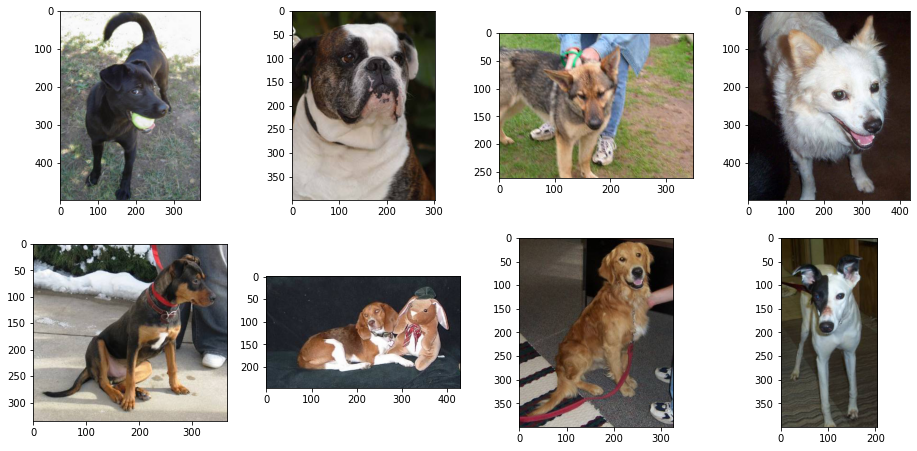

Figura Data de Gatos para la Validación


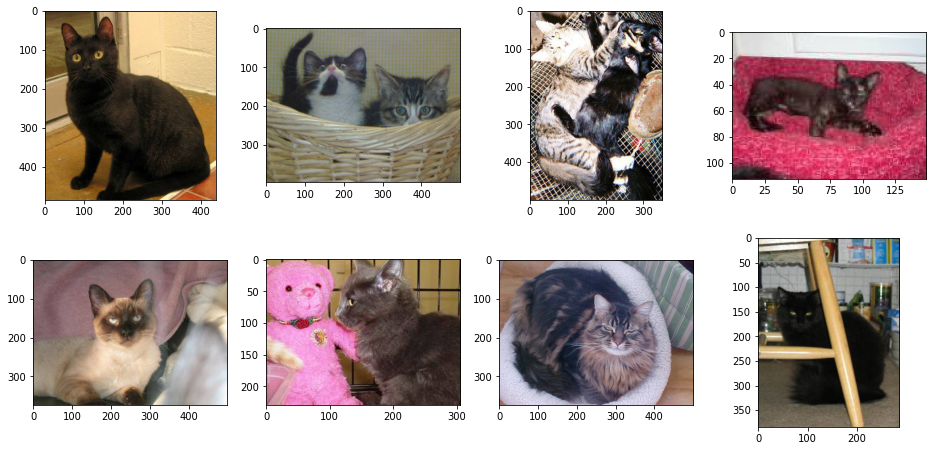

Figura Data de Perros para la Validación


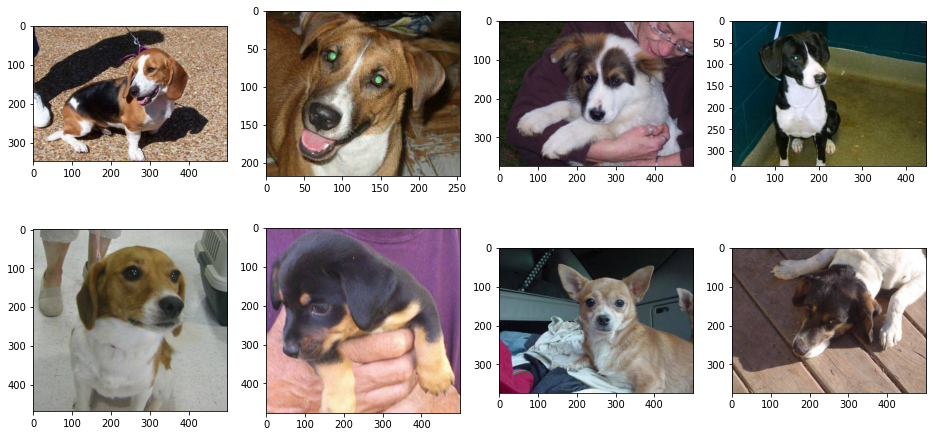

Figura Data de Gatos para el Test


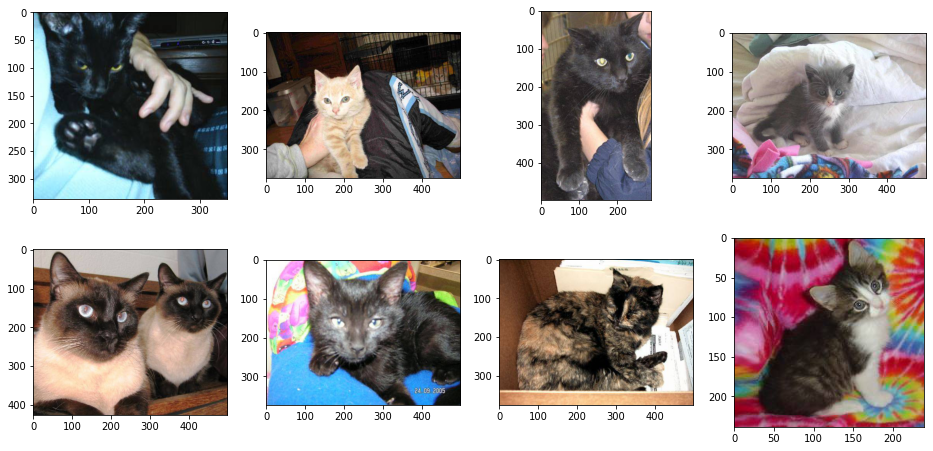

Figura Data de Perros para el Test


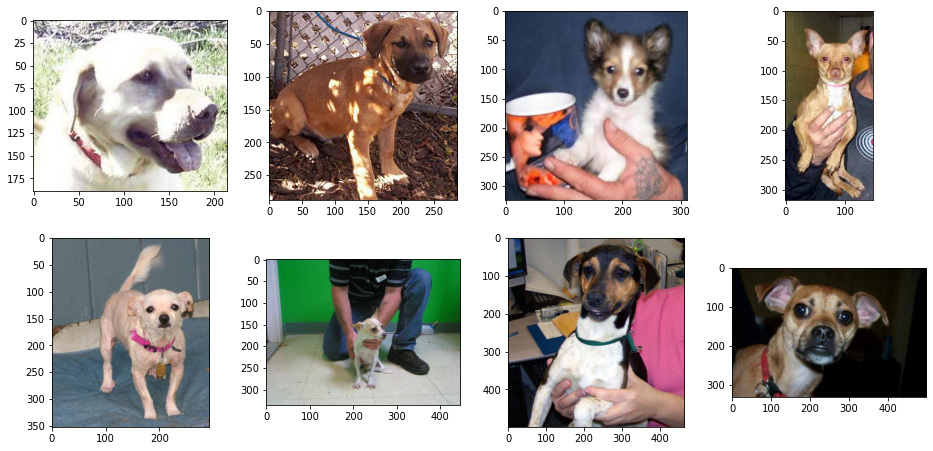

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def print_pictures(dir, fnames):
  # presentaremos imágene en una configuración de 4x4
  nrows = 4
  ncols = 4

  pic_index = 0 # Índice para iterar sobre las imágenes

  fig = plt.gcf()
  fig.set_size_inches(ncols*4, nrows*4)

  pic_index+=8

  next_pix = [os.path.join(dir, fname)
                for fname in fnames[ pic_index-8:pic_index]
               ]

  for i, img_path in enumerate(next_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

  plt.show()


print("Figura Data de Gatos para el Entrenamiento")
print_pictures(train_cats_dir, train_cat_fnames)
print("Figura Data de Perros para el Entrenamiento")
print_pictures(train_dogs_dir, train_dog_fnames)
print("Figura Data de Gatos para la Validación")
print_pictures(validation_cats_dir, validation_cat_fnames)
print("Figura Data de Perros para la Validación")
print_pictures(validation_dogs_dir, validation_dog_fnames)
print("Figura Data de Gatos para el Test")
print_pictures(test_cats_dir, test_cat_fnames)
print("Figura Data de Perros para el Test")
print_pictures(test_dogs_dir, test_dog_fnames)

Saving Gato.png to Gato.png


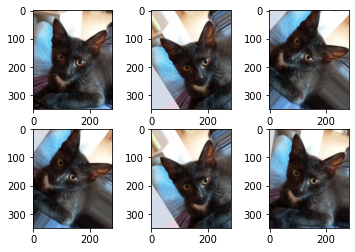

In [ ]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/' + fn
  img=image.load_img(path)
  data = img_to_array(img)
  samples = expand_dims(data, 0)

  # ejemplo de rotación de imágenes a 45 grados "rotation_range"
  datagen = ImageDataGenerator(rotation_range=45)

  it = datagen.flow(samples, batch_size=1)
  for i in range(6):
  	pyplot.subplot(230 + 1 + i)
  	batch = it.next()
  	image = batch[0].astype('uint8')
  	pyplot.imshow(image)
pyplot.show()

### ModelDA: Modelo con *Data Augmentation*

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

modelDA = Sequential()
modelDA.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
modelDA.add(MaxPooling2D(2, 2))
modelDA.add(Conv2D(64, (3,3), activation='relu'))
modelDA.add(MaxPooling2D(2,2))
modelDA.add(Conv2D(128, (3,3), activation='relu'))
modelDA.add(MaxPooling2D(2,2))
modelDA.add(Conv2D(128, (3,3), activation='relu'))
modelDA.add(MaxPooling2D(2,2))
modelDA.add(Flatten())
modelDA.add(Dense(512, activation='relu'))
modelDA.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import RMSprop

modelDA.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])



/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
modelDA.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

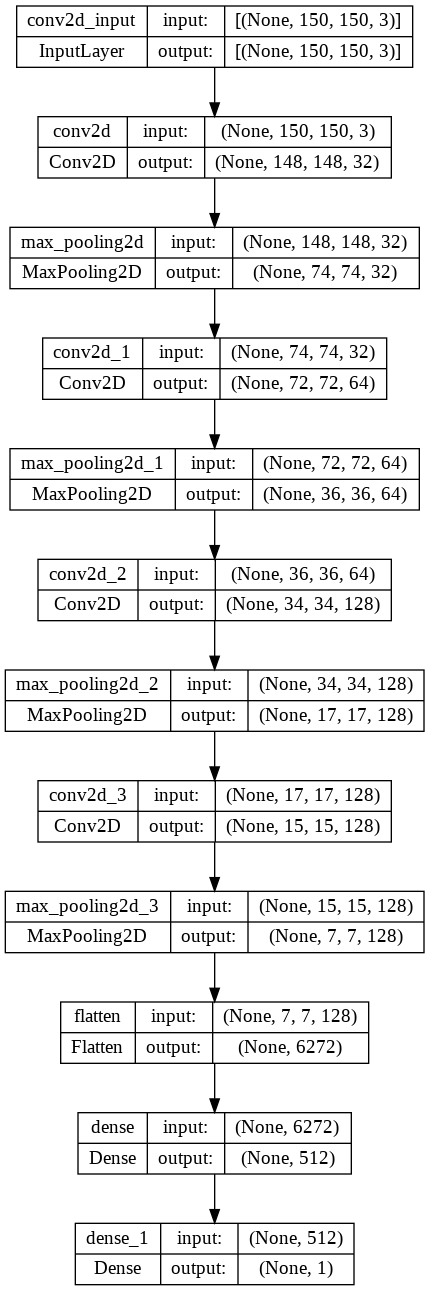

In [ ]:
keras.utils.plot_model(modelDA, 'modelDA.png', show_shapes=True)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyDA = modelDA.fit(
      train_generator,
      steps_per_epoch= steps_per_epoch,
      epochs= 20,
      validation_data= validation_generator,
      validation_steps= validation_steps,
      verbose=2)

Epoch 1/20
100/100 - 84s - loss: 0.6949 - acc: 0.5235 - val_loss: 0.6879 - val_acc: 0.5010 - 84s/epoch - 844ms/step
Epoch 2/20
100/100 - 80s - loss: 0.6829 - acc: 0.5635 - val_loss: 0.6687 - val_acc: 0.6070 - 80s/epoch - 804ms/step
Epoch 3/20
100/100 - 80s - loss: 0.6662 - acc: 0.5865 - val_loss: 0.6432 - val_acc: 0.6280 - 80s/epoch - 796ms/step
Epoch 4/20
100/100 - 81s - loss: 0.6607 - acc: 0.6070 - val_loss: 0.6361 - val_acc: 0.6310 - 81s/epoch - 806ms/step
Epoch 5/20
100/100 - 78s - loss: 0.6420 - acc: 0.6440 - val_loss: 0.6635 - val_acc: 0.5850 - 78s/epoch - 784ms/step
Epoch 6/20
100/100 - 80s - loss: 0.6294 - acc: 0.6500 - val_loss: 0.5884 - val_acc: 0.6910 - 80s/epoch - 799ms/step
Epoch 7/20
100/100 - 78s - loss: 0.6204 - acc: 0.6755 - val_loss: 0.5879 - val_acc: 0.6840 - 78s/epoch - 778ms/step
Epoch 8/20
100/100 - 78s - loss: 0.6060 - acc: 0.6590 - val_loss: 0.6319 - val_acc: 0.6160 - 78s/epoch - 783ms/step
Epoch 9/20
100/100 - 79s - loss: 0.5957 - acc: 0.6740 - val_loss: 0.5611

In [ ]:
print (steps_per_epoch)
print (validation_steps)
test_lost, test_acc= modelDA.evaluate(test_generator)
print ("Precisión en el Test (Acc):", test_acc)

100
50
50/50 [==============================] - 11s 214ms/step - loss: 0.4938 - acc: 0.7560
Precisión en el Test (Acc): 0.7559999823570251


<Figure size 432x288 with 0 Axes>

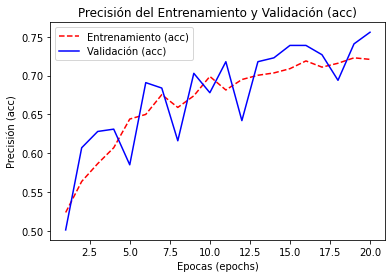

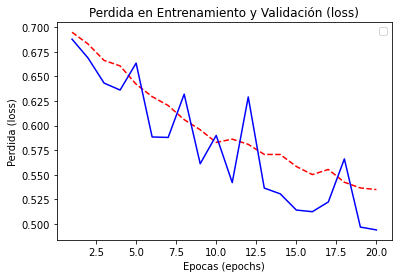

<Figure size 432x288 with 0 Axes>

In [ ]:

import matplotlib.pyplot as plt


acc      = historyDA.history[     'acc' ]
val_acc  = historyDA.history[ 'val_acc' ]
loss     = historyDA.history[    'loss' ]
val_loss = historyDA.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epocas (epochs)

plt.plot  ( epochs,     acc, 'r--', label='Entrenamiento (acc)'  )
plt.plot  ( epochs, val_acc,  'b', label='Validación (acc)')
plt.title ('Precisión del Entrenamiento y Validación (acc)')
plt.ylabel('Precisión (acc)')
plt.xlabel('Epocas (epochs)')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Perdida en Entrenamiento y Validación (loss)'   )
plt.ylabel('Perdida (loss)')
plt.xlabel('Epocas (epochs)')

plt.legend()
plt.figure()



### ModelFE: Modelo con *Feature Extraction*

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


from tensorflow.keras.applications import VGG16

modelVGG16 = VGG16(input_shape = (224, 224, 3),
                                weights = 'imagenet')



modelVGG16.summary()




553467096/553467096 [==============================] - 8s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

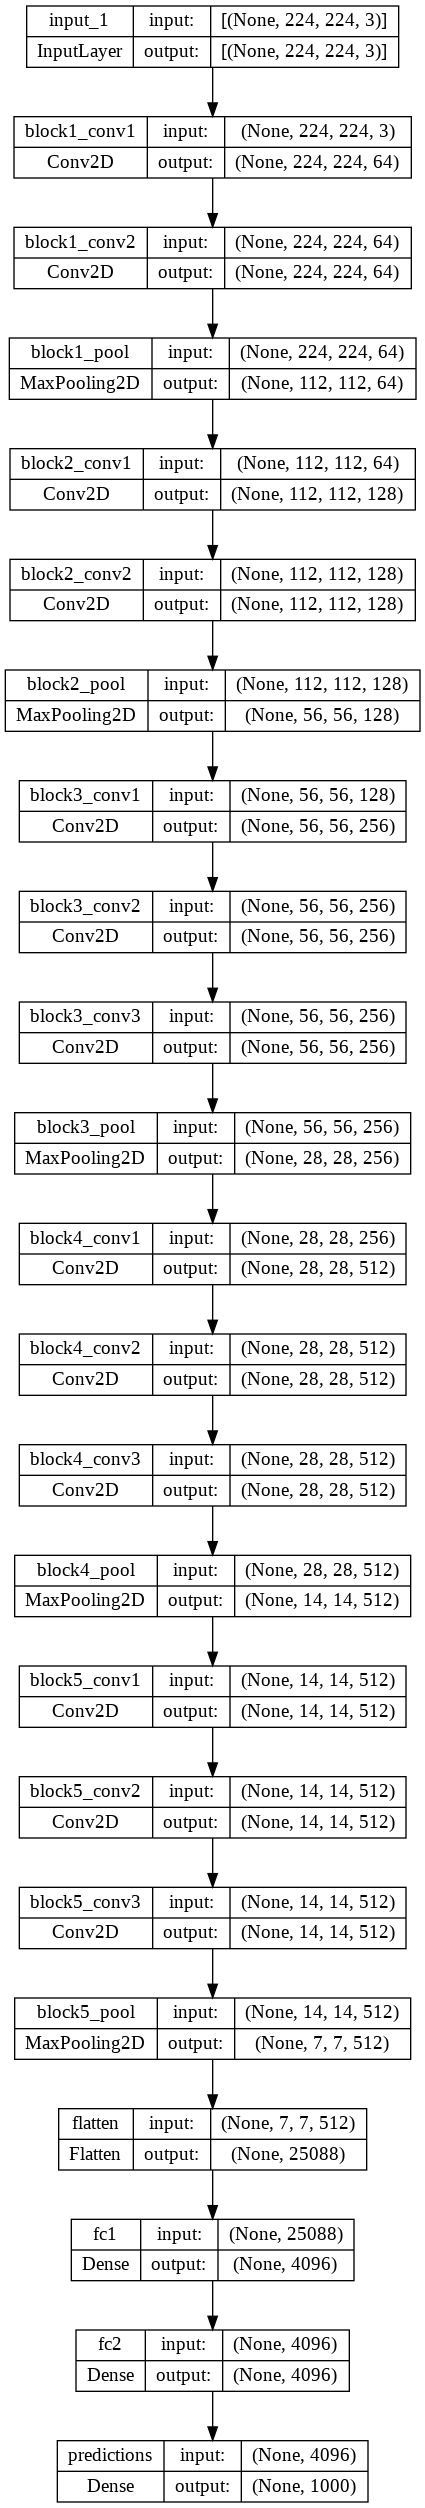

In [ ]:
keras.utils.plot_model(modelVGG16, 'modelVGG16.png', show_shapes=True)

In [ ]:

from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = 'imagenet')


pre_trained_model.summary()

for layer in pre_trained_model.layers:
  layer.trainable = False


pre_trained_model.summary()




Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

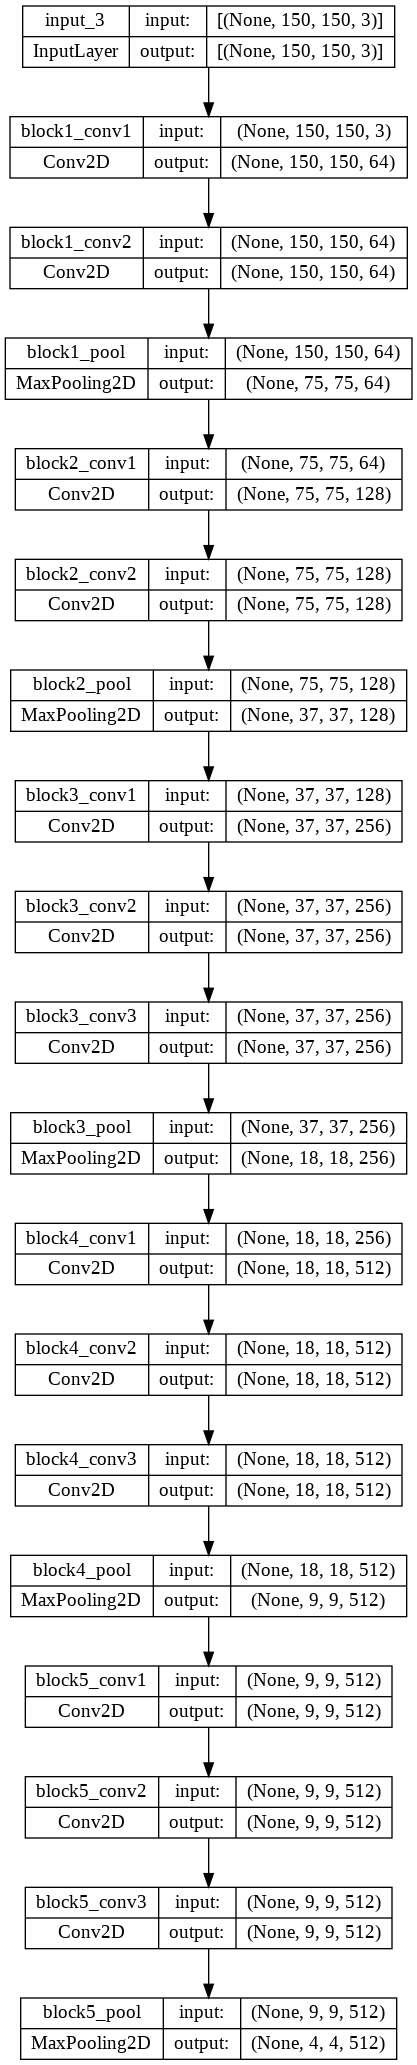

In [ ]:
keras.utils.plot_model(pre_trained_model, 'pre_trained_model.png', show_shapes=True)

In [ ]:
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

modelFE = Sequential()
modelFE.add(pre_trained_model)
modelFE.add(Flatten())
modelFE.add(Dense(256, activation='relu'))
modelFE.add(Dense(1, activation='sigmoid'))


In [ ]:
modelFE.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


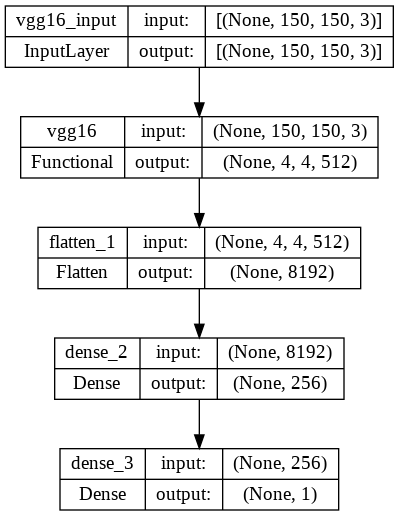

In [ ]:
keras.utils.plot_model(modelFE, 'modelFE.png', show_shapes=True)

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=100,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=100,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))





Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#from tensorflow.keras.optimizers import RMSprop

modelFE.compile(loss='binary_crossentropy',
              optimizer='sgd', #RMSprop(lr=1e-1),
              metrics=['acc'])

batch_size = 100
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyFE = modelFE.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = steps_per_epoch,
            epochs = 20,
            validation_steps = validation_steps,
            verbose = 1)



Epoch 1/20
20/20 [==============================] - 484s 24s/step - loss: 0.8048 - acc: 0.5495 - val_loss: 0.6169 - val_acc: 0.6230
Epoch 2/20
20/20 [==============================] - 481s 24s/step - loss: 0.5970 - acc: 0.6815 - val_loss: 0.6574 - val_acc: 0.5400
Epoch 3/20
20/20 [==============================] - 522s 27s/step - loss: 0.6540 - acc: 0.6330 - val_loss: 0.5720 - val_acc: 0.6670
Epoch 4/20
20/20 [==============================] - 521s 27s/step - loss: 0.5774 - acc: 0.6895 - val_loss: 0.4772 - val_acc: 0.7800
Epoch 5/20
20/20 [==============================] - 521s 27s/step - loss: 0.5540 - acc: 0.7120 - val_loss: 0.4649 - val_acc: 0.7760
Epoch 6/20
20/20 [==============================] - 522s 27s/step - loss: 0.5661 - acc: 0.7000 - val_loss: 0.4352 - val_acc: 0.8260
Epoch 7/20
20/20 [==============================] - 524s 27s/step - loss: 0.5446 - acc: 0.7190 - val_loss: 0.4473 - val_acc: 0.7780
Epoch 8/20
20/20 [==============================] - 526s 27s/step - loss: 0.

In [ ]:
test_lost, test_acc= modelFE.evaluate(test_generator)
print ("Precisión Test (acc):", test_acc)

In [ ]:

import matplotlib.pyplot as plt


acc      = historyFE.history[     'acc' ]
val_acc  = historyFE.history[ 'val_acc' ]
loss     = historyFE.history[    'loss' ]
val_loss = historyFE.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

plt.plot  ( epochs,     acc, 'r--', label='Entrenamiento (acc)'  )
plt.plot  ( epochs, val_acc,  'b', label='Validación (acc)')
plt.title ('Precisión del Entrenamiento y Validación')
plt.ylabel('Precisión (acc)')
#plt.ylim(0,1)
plt.xlabel('Epocas (epochs)')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--', label='Entrenamiento (loss)'  )
plt.plot  ( epochs, val_loss ,  'b', label='Validación (loss)' )
plt.title ('Perdida en el Entrenamiento y Validación (loss)'   )
plt.ylabel('Perdida (loss)')
plt.xlabel('Epocas (epochs)')
#plt.ylim(0,1)

plt.legend()
plt.figure()




### ModelFT : Modelo con *Fine Tuning*

In [ ]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = 'imagenet')

pre_trained_model.trainable = True

set_trainable = False


for layer in pre_trained_model.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

pre_trained_model.summary()




In [ ]:
modelFT = Sequential()
modelFT.add(pre_trained_model)
modelFT.add(Flatten())
modelFT.add(Dense(256, activation='relu'))
modelFT.add(Dense(1, activation='sigmoid'))


modelFT.summary()

In [ ]:
keras.utils.plot_model(modelFT, 'modelFT.png', show_shapes=True)

In [ ]:
#from tensorflow.keras.optimizers import RMSprop

modelFT.compile(loss='binary_crossentropy',
              optimizer='sgd', #RMSprop(lr=1e-1),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=10,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=10,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=10,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))



In [ ]:
batch_size = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyFT = modelFT.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = steps_per_epoch,
            epochs = 20,
            validation_steps = validation_steps,
            verbose = 2)


In [ ]:


import matplotlib.pyplot as plt

acc      = historyFT.history[     'acc' ]
val_acc  = historyFT.history[ 'val_acc' ]
loss     = historyFT.history[    'loss' ]
val_loss = historyFT.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epocas (epochs)

plt.plot  ( epochs,     acc, 'r--', label='Entrenamiento (acc)'  )
plt.plot  ( epochs, val_acc,  'b', label='Validación (acc)')
plt.title ('Precisión del Entrenamiento y Validación')
plt.ylabel('Precisión (acc)')
#plt.ylim(0,1)
plt.xlabel('Epocas (epochs)')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--', label='Entrenamiento (loss)' )
plt.plot  ( epochs, val_loss ,  'b', label='Validación (loss)' )
plt.title ('Perdida en el Entrenamiento y Validación (loss)'   )
plt.ylabel('Perdida (loss)')
plt.xlabel('Epocas (epochs)')
plt.ylim(0,1)

plt.legend()
plt.figure()



In [ ]:
test_lost, test_acc= modelFT.evaluate(test_generator)
print ("Precisión Test (acc):", test_acc)

In [ ]:

accDA      = historyDA.history[     'acc' ]
val_accDA  = historyDA.history[ 'val_acc' ]

accFE      = historyFE.history[     'acc' ]
val_accFE  = historyFE.history[ 'val_acc' ]

accFT      = historyFT.history[     'acc' ]
val_accFT  = historyFT.history[ 'val_acc' ]

epochs    = range(1,len(accDA)+1,1)

plt.figure(figsize=(10,18))

plt.plot  ( epochs,     accFT, 'k', label='Sintonizar Fina (Fine Tuning) - Entrenamiento (acc)'  )
plt.plot  ( epochs, val_accFT,  'b', label='Sintonizar Fina (Fine Tuning) - Validación (acc)')

plt.plot  ( epochs,     accFE, 'r--', label='Extracción de Características (Feature Extraction) - Training (acc)'  )
plt.plot  ( epochs, val_accFE,  'm--', label='Extracción de Características (Feature Extraction) - Validación (acc)')

plt.plot  ( epochs,     accDA, 'g:', label='Aumento de Datos (Data Augmentation) - Training (acc)'  )
plt.plot  ( epochs, val_accDA,  'c:', label='Aumento de Datos (Data Augmentation) - Validación (acc)')

plt.title ('Precisión del Entrenamiento y Validación')
plt.ylabel('Precisión (acc)')
plt.ylim(0.5,1)
plt.xlabel('Epocas (epochs)')


plt.legend()
plt.figure()





In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded=files.upload()
file=list(uploaded.keys())[0]

path='/content/' + file
img=image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
image=np.expand_dims(x, axis=0)

classes = model.predict(image)
print(classes)

plt.imshow(img)
plt.show()

if classes>0: print( file + " Es un PERRO")
else: print( file + " Es un GATO")
